In [ ]:
!pip install paddlepaddle
!pip install paddleocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.9/125.9 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.0/780.0 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 70.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!git clone https://github.com/PaddlePaddle/PaddleOCR

Cloning into 'PaddleOCR'...
remote: Enumerating objects: 48649, done.
remote: Counting objects: 100% (1003/1003), done.
remote: Compressing objects: 100% (762/762), done.
remote: Total 48649 (delta 323), reused 759 (delta 229), pack-reused 47646
Receiving objects: 100% (48649/48649), 346.68 MiB | 22.89 MiB/s, done.
Resolving deltas: 100% (33853/33853), done.
Updating files: 100% (1923/1923), done.


In [ ]:
from paddleocr import PaddleOCR, draw_ocr
from matplotlib import pyplot as plt
import cv2
import glob

In [ ]:
!unzip Images_set2.zip

Archive:  Images_set2.zip
  inflating: Images_set2/map_25.png  
  inflating: Images_set2/map_26.png  
  inflating: Images_set2/map_40.png  
  inflating: Images_set2/map_49.png  
  inflating: Images_set2/map_61.png  
  inflating: Images_set2/map_62.png  
  inflating: Images_set2/map_65.png  


In [ ]:
ocr_model = PaddleOCR(lang='en')

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:08<00:00, 453kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10.2M/10.2M [00:18<00:00, 568kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:14<00:00, 148kiB/s]

[2024/04/26 10:14:48] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='

In [ ]:
img_path = '/content/Images_set2'

In [ ]:
img_paths = glob.glob(img_path + '*.png')

In [ ]:
results = {}

In [ ]:
import pandas as pd
annotations_df = pd.read_csv("annotation_set2.csv")

data=[]
for row in annotations_df.itertuples():
  file_name = row[1]
  map_type = row[5]
  title_bounding_box = row[3]
  legend_bounding_box = row[4]
  data.append((file_name, map_type, title_bounding_box, legend_bounding_box))

print(data)

[('map_62.png', 'continuous', "(' 3', ' 24', ' 31', ' 436')", "(' 67', ' 614', ' 487', ' 695')"), ('map_26.png', 'discrete', "(' 19', ' 24', ' 48', ' 669')", "(' 458', ' 26', ' 494', ' 397')"), ('map_40.png', 'continuous', "(' 16', ' 26', ' 45', ' 589')", "(' 73', ' 614', ' 499', ' 695')"), ('map_65.png', 'continuous', "(' 16', ' 44', ' 46', ' 249')", "(' 74', ' 612', ' 490', ' 696')"), ('map_49.png', 'continuous', "(' 4', ' 51', ' 28', ' 672')", "(' 73', ' 607', ' 489', ' 694')"), ('map_25.png', 'discrete', "(' 14', ' 21', ' 46', ' 611')", "(' 458', ' 82', ' 494', ' 610')")]


In [50]:
# Function to convert bound variables to doubles and extract units
def convert_to_doubles(low, upper_bound):
  low=lower_bound.replace(",", "")
  low=low.replace(" ", "")
  up=upper_bound.replace(",", "")
  up=up.replace(" ", "")
  print(low)
  print(up)
  # Check if last character of lower_bound is not a digit
  if low != "":
    if not low[-1].isdigit():
      units = low[-1]
      low = float(low[:-1])
    else:
      units = 'u'
      low = float(low)

  # Check if last character of upper_bound is not a digit
  if up != "":
    if not up[-1].isdigit():
      units = up[-1]
      up = float(up[:-1])
    else:
      units = 'u'
      up = float(up)

  return low, up, units

In [51]:
from google.colab.patches import cv2_imshow
import logging

# Suppress PaddleOCR warning and debug messages
logging.getLogger("PaddleOCR").setLevel(logging.ERROR)

for img_path in img_paths:
    result = ocr_model.ocr(img_path)
    results[img_path] = result

def num_there(s):
    return any(i.isdigit() for i in s)

def only_num(s):
    return s.isnumeric()

def contains_hyphen(text):
    """
    Check if the given text contains the character '-'.

    Args:
        text (str): The text to check.

    Returns:
        bool: True if the text contains '-', False otherwise.
    """
    return '-' in text

In [52]:
def extract_numbers(test_string):
  # Initialize a translation table to remove non-numeric characters
  translation_table = str.maketrans('', '', 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~')
  # Use str.translate() with the translation table to remove non-numeric characters
  numeric_string = test_string.translate(translation_table)
  # Use str.split() to split the string into a list of word
  words = numeric_string.split()
  numbers = [int(i) for i in words]
  # print("The numbers list is : " + str(numbers))
  return numbers

map_62.png


[2024/04/26 11:07:46] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.09746003150939941
[2024/04/26 11:07:46] ppocr DEBUG: rec_res num  : 1, elapsed : 0.20214080810546875
Average Annual Growth in Medicaid Spending | KFF


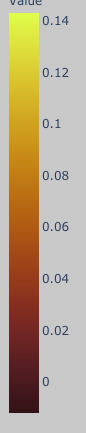

[2024/04/26 11:07:46] ppocr DEBUG: dt_boxes num : 9, elapsed : 0.08335137367248535
[2024/04/26 11:07:46] ppocr DEBUG: rec_res num  : 9, elapsed : 0.40371108055114746
0.14
0.12
0.1
0.08
0.06
0.04
0.02
0.14
0.14
0.12
0.12
0.1
0.1
0.08
0.08
0.06
0.06
0.04
0.04
0.02
0.02
map_26.png


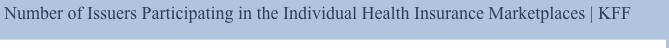

[2024/04/26 11:07:47] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.13364624977111816
[2024/04/26 11:07:47] ppocr DEBUG: rec_res num  : 1, elapsed : 0.3591115474700928
Number of Issuers Participating in the Individual Health Insurance Marketplaces | KFF


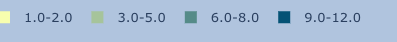

[2024/04/26 11:07:47] ppocr DEBUG: dt_boxes num : 6, elapsed : 0.051801443099975586
[2024/04/26 11:07:47] ppocr DEBUG: rec_res num  : 6, elapsed : 0.2626776695251465
1.0-2.0
3.0-5.0
6.0-8.0
9.0-12.0
1.0
2.0
3.0
5.0
6.0
8.0
9.0
12.0
map_40.png


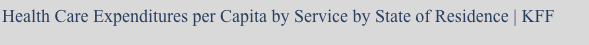

[2024/04/26 11:07:47] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.11242818832397461
[2024/04/26 11:07:48] ppocr DEBUG: rec_res num  : 1, elapsed : 0.2707962989807129
Health Care Expenditures per Capita by Service by State of Residence | KFF


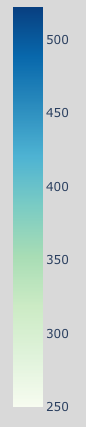

[2024/04/26 11:07:48] ppocr DEBUG: dt_boxes num : 6, elapsed : 0.051876068115234375
[2024/04/26 11:07:48] ppocr DEBUG: rec_res num  : 6, elapsed : 0.2657136917114258
500
450
400
350
300
250
500
500
450
450
400
400
350
350
300
300
250
250
map_65.png


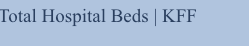

[2024/04/26 11:07:48] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.05546379089355469
[2024/04/26 11:07:48] ppocr DEBUG: rec_res num  : 1, elapsed : 0.11862325668334961
Iotal Hospital Beds | KFF


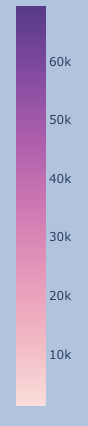

[2024/04/26 11:07:48] ppocr DEBUG: dt_boxes num : 6, elapsed : 0.03671550750732422
[2024/04/26 11:07:49] ppocr DEBUG: rec_res num  : 6, elapsed : 0.2920362949371338
60k
50k
40k
30k
20k
10k
60k
60k
50k
50k
40k
40k
30k
30k
20k
20k
10k
10k
map_49.png


[2024/04/26 11:07:49] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.11826300621032715
[2024/04/26 11:07:49] ppocr DEBUG: rec_res num  : 1, elapsed : 0.2905614376068115
Medicaid Coverage Rates for the Nonelderly by Federal Poverty Level (FPL) | KFF


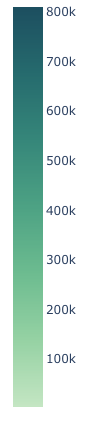

[2024/04/26 11:07:49] ppocr DEBUG: dt_boxes num : 8, elapsed : 0.03233957290649414
[2024/04/26 11:07:49] ppocr DEBUG: rec_res num  : 8, elapsed : 0.41622090339660645
800k
700k
600k
500k
400k
300k
200k
100k
800k
800k
700k
700k
600k
600k
500k
500k
400k
400k
300k
300k
200k
200k
100k
100k
map_25.png


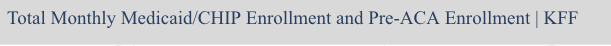

[2024/04/26 11:07:50] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.09215903282165527
[2024/04/26 11:07:50] ppocr DEBUG: rec_res num  : 1, elapsed : 0.26952219009399414
Total Monthly Medicaid/CHIP Enrollment and Pre-ACA Enrollment | KFF


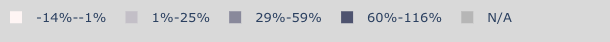

[2024/04/26 11:07:50] ppocr DEBUG: dt_boxes num : 9, elapsed : 0.02915644645690918
[2024/04/26 11:07:50] ppocr DEBUG: rec_res num  : 9, elapsed : 0.42102503776550293
-14%--1%
1%-25%
29%-59%
60%-116%
N/A

14%


TypeError: can only concatenate str (not "float") to str

In [53]:
# Code to obtain OCR results on the map image by splitting into 2 sub-images
# The 2 sub-images will contain only the Title and only the legend/colour bar area.
# Thus, we perform OCR on the 2 sub-images separately and store the results.

from google.colab.patches import cv2_imshow
import numpy as np
from PIL import Image
from numpy import asarray

# title_bounding_box = [159, 17, 272, 29]
# legend_bounding_box = [249, 471, 325, 25]

complete_data = []

for ele in data:
  file_name = ele[0]
  print(file_name)
  map_type = ele[1]
  title_bounding_box = ele[2]
  legend_bounding_box = ele[3]

  values = extract_numbers(title_bounding_box)

  imgPath = "/content/Images_set2/"+file_name
  image = cv2.imread(imgPath)

  y, x, h, w = values

  cropped_img = image[y:y+h, x:x+w]
  cv2_imshow(cropped_img)
  numpydata = asarray(cropped_img)

  result = ocr_model.ocr(numpydata, cls=False)
  map_title = result[0][0][1][0]

  print(map_title)
  # results[imgPath] = result

  numerical_info = []
  values = extract_numbers(legend_bounding_box)
  y, x, h, w = values

  cropped_img = image[y:y+h, x:x+w]
  cv2_imshow(cropped_img)
  numpydata = asarray(cropped_img)

  result = ocr_model.ocr(numpydata, cls=False)

  for line in result:
    for word in line:
      text = word[1][0]
      if text!="N/A" and num_there(text)==0:
        continue
      print(text)
      x, y, w, h = word[0][0][0], word[0][0][1], abs(word[0][0][0]-word[0][1][0]), abs(word[0][1][1]-word[0][2][1])

      x1 = int(x)
      y1 = int(y+h//2)
      x2 = int(x)
      y2 = int(y+h//2-1)

      while x2>=0 and all(image[y1, x1]==image[y2, x2]):
        x2-=1
      x3 = x2
      while x3 >=0 and all(image[y1, x1]==image[y2, x3]):
        x3-=1

      x2 = (x2+x3)//2
      color = image[y2,x2]
      # print(color)
      blue, green, red = color
      numerical_info += [text] + [red, green, blue]

  i=0
  value_id = 0
  while i<len(numerical_info):
    value_id += 1

    if numerical_info[i] and numerical_info[i]!="N/A" and numerical_info[i]!="-":
      values = numerical_info[i].split("-")

      if len(values)>1:
        lower_bound = values[0]
        upper_bound = values[1]
      else:
        lower_bound = values[0]
        upper_bound = values[0]

      converted_lower_bound, converted_upper_bound, units = convert_to_doubles(lower_bound, upper_bound)
      info = [file_name, map_type, map_title, numerical_info[i+1], numerical_info[i+2], numerical_info[i+3], (converted_lower_bound+converted_upper_bound)/2, units]

    else:
      values = "N/A"
      info = [file_name, map_type, map_title, numerical_info[i+1], numerical_info[i+2], numerical_info[i+3], values, ""]
    # map_name = img_path.split("/")[-1].split(".")[0]
    # info = [map_name] + info
    complete_data += [info]

    i+=4

# print(complete_data)

In [ ]:
# # Code to obtain OCR results on the map image by splitting into 2 sub-images
# # The 2 sub-images will contain only the Title and only the legend/colour bar area.
# # Thus, we perform OCR on the 2 sub-images separately and store the results.

# from google.colab.patches import cv2_imshow
# import numpy as np
# from PIL import Image
# from numpy import asarray

# # title_bounding_box = [159, 17, 272, 29]
# # legend_bounding_box = [249, 471, 325, 25]

# complete_data = []

# for img_path in img_paths:
#   # for ele in data:
#   #   print(ele)
#   #   complete_data += ele[1]
#   # title_info = []
#   x, y, w, h = title_bounding_box
#   x = x - (w//2)
#   y = y - (h//2)

#   image = cv2.imread(img_path)
#   cropped_img = image[y:y+h, x:x+w]
#   cv2_imshow(cropped_img)
#   numpydata = asarray(cropped_img)

#   result = ocr_model.ocr(numpydata, cls=False)
#   title = result[0][0][1][0]
#   # title_info += title
#   complete_data += [title]
#   print(title)
#   results[img_path] = result

#   numerical_info = []
#   x, y, w, h = legend_bounding_box
#   x = x - (w//2)
#   y = y - (h//2)

#   cropped_img = image[y:y+h, x:x+w]
#   cv2_imshow(cropped_img)
#   numpydata = asarray(cropped_img)

#   result = ocr_model.ocr(numpydata, cls=False)

#   for line in result:
#     for word in line:
#       print(word)

#       text = word[1][0]
#       print(text)
#       x, y, w, h = word[0][0][0], word[0][0][1], abs(word[0][0][0]-word[0][1][0]), abs(word[0][1][1]-word[0][2][1])

#       x1 = int(x)
#       y1 = int(y+h//2)
#       x2 = int(x)
#       y2 = int(y+h//2- 1)

#       while all(image[y1, x1]==image[y2, x2]):
#         x2-=1
#       x3 = x2
#       while all(image[y1, x1]==image[y2, x3]):
#         x3-=1

#       x2 = (x2+x3)//2
#       color = image[y2,x2]
#       blue, green, red = color
#       numerical_info += [text] + [red, green, blue]

#   i=0
#   value_id = 0
#   while i<len(numerical_info):
#     value_id += 1

#     if numerical_info[i]!="N/A":
#       values = numerical_info[i].split("-")

#       if len(values)>1:
#         lower_bound = values[0]
#         upper_bound = values[1]
#       else:
#         lower_bound = values[0]
#         upper_bound = values[0]

#       converted_lower_bound, converted_upper_bound, units = convert_to_doubles(lower_bound, upper_bound)
#       info = [value_id, numerical_info[i+1], numerical_info[i+2], numerical_info[i+3], (converted_lower_bound+converted_upper_bound)/2, units]

#     else:
#       values = "N/A"
#       info = [value_id, numerical_info[i+1], numerical_info[i+2], numerical_info[i+3], values, ""]
#     map_name = img_path.split("/")[-1].split(".")[0]
#     info = [map_name] + info
#     complete_data += [info]

#     i+=4

# print(complete_data)


# # Draw the bounding box on the image
# # color = (0, 255, 0)  # BGR color format (green in this case)
# # thickness = 4
# # # color1 = (255, 0, 0)

# # cv2.rectangle(image, (x, y), (x + w, y + h), color, thickness)
# # cv2_imshow(image)

In [ ]:
with open('/content/output.txt', 'w') as f:
    # Loop through the list and write each element to the file
    for item in complete_data:
        f.write(str(item) + '\n')


output_df = pd.Dataframe(complete_data)
output_df.to_csv('OCR_output.csv',index = False)

In [ ]:
results